<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_cluster_groupwise_(y_hat)_0_5_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.5_type_I _error'

In [4]:
os.listdir(base_path)

['data_groupwise_0.5_n20.csv',
 'data_groupwise_0.5_n30.csv',
 'data_groupwise_0.5_n60.csv',
 'data_groupwise_0.5_n120.csv',
 'data_groupwise_0.5_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.5_n60.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,45.740240,79.966466,62.189076,-0.346015,197.549767,197.879868,-0.330102
1,0.0,1.0,32.882602,43.539384,94.097795,0.115328,180.635108,180.671240,-0.036131
2,0.0,2.0,78.630546,43.055962,55.726842,-1.254615,186.158735,187.148394,-0.989659
3,0.0,3.0,88.836992,36.916501,35.415178,-0.348448,170.820222,170.767399,0.052823
4,0.0,4.0,91.384223,20.685588,36.700994,0.474708,159.245513,158.348494,0.897019
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,45.310136,54.987368,98.159569,0.349976,208.807048,208.388497,0.418551
59996,999.0,56.0,83.063871,44.987504,24.058748,-1.289987,160.820136,162.320037,-1.499901
59997,999.0,57.0,38.405241,37.312761,35.786782,0.783965,122.288749,121.648285,0.640464
59998,999.0,58.0,72.183625,76.633063,45.231158,-1.033637,203.014209,203.986033,-0.971824


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    45.740240  79.966466  62.189076  ...  197.549767  197.879868 -0.330102
      1.0    32.882602  43.539384  94.097795  ...  180.635108  180.671240 -0.036131
      2.0    78.630546  43.055962  55.726842  ...  186.158735  187.148394 -0.989659
      3.0    88.836992  36.916501  35.415178  ...  170.820222  170.767399  0.052823
      4.0    91.384223  20.685588  36.700994  ...  159.245513  158.348494  0.897019
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   45.310136  54.987368  98.159569  ...  208.807048  208.388497  0.418551
      56.0   83.063871  44.987504  24.058748  ...  160.820136  162.320037 -1.499901
      57.0   38.405241  37.312761  35.786782  ...  122.288749  121.648285  0.640464
      58.0   72.183625  76.633063  45.231158  ...  203.014209  203.986033 -0.971824
      59.0   55.154207  28.416526  73.179655  ...  167.483673  166.924119  0.559554

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    45.740240  79.966466  62.189076  ...  197.549767  197.879868 -0.330102
      1.0    32.882602  43.539384  94.097795  ...  180.635108  180.671240 -0.036131
      2.0    78.630546  43.055962  55.726842  ...  186.158735  187.148394 -0.989659
      3.0    88.836992  36.916501  35.415178  ...  170.820222  170.767399  0.052823
      4.0    91.384223  20.685588  36.700994  ...  159.245513  158.348494  0.897019
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   45.310136  54.987368  98.159569  ...  208.807048  208.388497  0.418551
      56.0   83.063871  44.987504  24.058748  ...  160.820136  162.320037 -1.499901
      57.0   38.405241  37.312761  35.786782  ...  122.288749  121.648285  0.640464
      58.0   72.183625  76.633063  45.231158  ...  203.014209  203.986033 -0.971824
      59.0   55.154207  28.416526  73.179655  ...  167.483673  166.924119  0.559554

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,45.740240,79.966466,62.189076,-0.346015,197.549767,197.879868,-0.330102
1,0.0,1.0,32.882602,43.539384,94.097795,0.115328,180.635108,180.671240,-0.036131
2,0.0,2.0,78.630546,43.055962,55.726842,-1.254615,186.158735,187.148394,-0.989659
3,0.0,3.0,88.836992,36.916501,35.415178,-0.348448,170.820222,170.767399,0.052823
4,0.0,4.0,91.384223,20.685588,36.700994,0.474708,159.245513,158.348494,0.897019
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,45.310136,54.987368,98.159569,0.349976,208.807048,208.388497,0.418551
59996,999.0,56.0,83.063871,44.987504,24.058748,-1.289987,160.820136,162.320037,-1.499901
59997,999.0,57.0,38.405241,37.312761,35.786782,0.783965,122.288749,121.648285,0.640464
59998,999.0,58.0,72.183625,76.633063,45.231158,-1.033637,203.014209,203.986033,-0.971824


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    45.740240  79.966466  62.189076  ...  197.549767  197.879868 -0.330102
      1.0    32.882602  43.539384  94.097795  ...  180.635108  180.671240 -0.036131
      2.0    78.630546  43.055962  55.726842  ...  186.158735  187.148394 -0.989659
      3.0    88.836992  36.916501  35.415178  ...  170.820222  170.767399  0.052823
      4.0    91.384223  20.685588  36.700994  ...  159.245513  158.348494  0.897019
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   45.310136  54.987368  98.159569  ...  208.807048  208.388497  0.418551
      56.0   83.063871  44.987504  24.058748  ...  160.820136  162.320037 -1.499901
      57.0   38.405241  37.312761  35.786782  ...  122.288749  121.648285  0.640464
      58.0   72.183625  76.633063  45.231158  ...  203.014209  203.986033 -0.971824
      59.0   55.154207  28.416526  73.179655  ...  167.483673  166.924119  0.559554

[60000 rows x 7 columns]

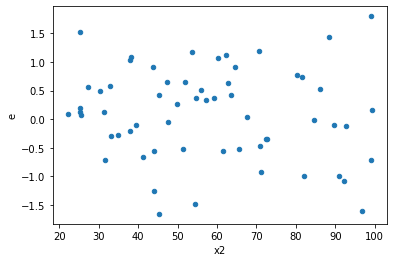

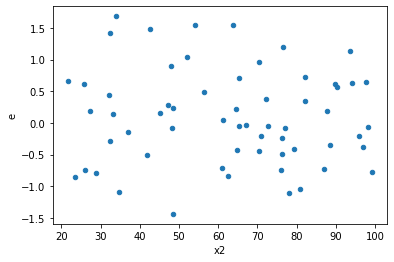

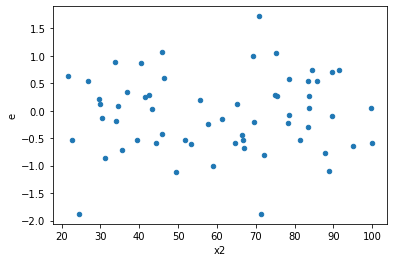

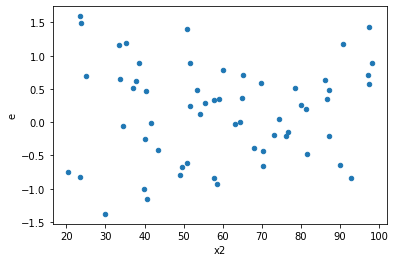

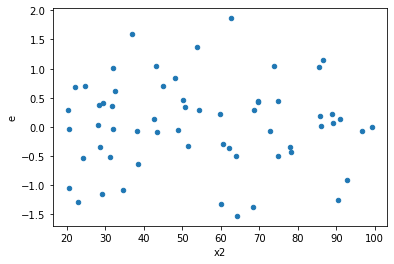

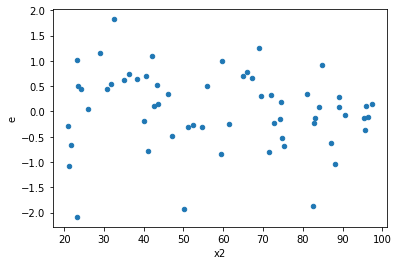

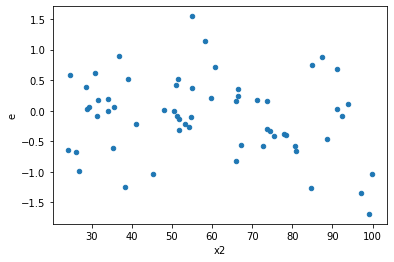

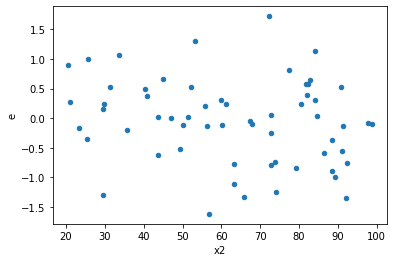

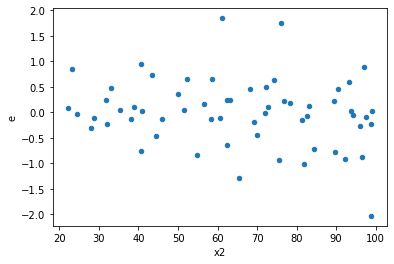

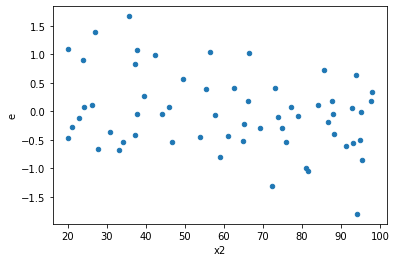

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,38.0,16.0,15.205855035018491,7.810437610088975,0.40015407986890766,0.48815235063056095,1.2199109672716117,0.6870558461193279,0.656472076940336,0.34352792305966395,Reject005=1 : Homoscedasticity
2.0,31.0,23.0,13.0412032122906,10.738529136726404,0.4206839745900194,0.4668925711620176,1.1098415897991625,0.8062806855404832,0.5968596572297584,0.4031403427702416,Reject005=1 : Homoscedasticity
3.0,21.0,33.0,6.408555238453289,11.327261603171287,0.30516929706920426,0.3432503516112511,1.1247866509107274,0.74466854205653,0.627665728971735,0.372334271028265,Reject005=1 : Homoscedasticity
4.0,31.0,23.0,9.983798872583902,10.126117029754766,0.3220580281478678,0.4402659578154246,1.3670392268975935,0.4419331062287051,0.7790334468856475,0.22096655311435254,Reject005=1 : Homoscedasticity
6.0,33.0,21.0,11.77670751043125,11.708027036761793,0.35686992455852273,0.5575250969886568,1.5622641714018377,0.2855744395919859,0.857212780204007,0.14278721979599296,Reject005=1 : Homoscedasticity
7.0,25.0,29.0,10.16213085412288,15.902507703662124,0.4064852341649152,0.5483623346090387,1.3490338357200018,0.4356694741601326,0.7821652629199337,0.2178347370800663,Reject005=1 : Homoscedasticity
10.0,33.0,21.0,20.981164133930385,13.62361431225525,0.6357928525433449,0.6487435386788215,1.0203693484185459,0.9831193332400483,0.5084403333799759,0.49155966662002415,Reject005=1 : Homoscedasticity
11.0,28.0,26.0,14.962102667124821,14.066968980349033,0.5343608095401722,0.5410372684749628,1.0124942900294949,0.9783338962979637,0.5108330518510181,0.4891669481489819,Reject005=1 : Homoscedasticity
12.0,20.0,34.0,8.350404341005886,17.974910638013903,0.4175202170502943,0.5286738422945265,1.2662233365117328,0.5308882907662464,0.7345558546168768,0.2654441453831232,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,38.0,16.0,15.205855035018491,7.810437610088975,0.40015407986890766,0.48815235063056095,1.2199109672716117,0.6870558461193279,Reject005=1 : Homoscedasticity
1.0,27.0,27.0,17.621040804609734,8.44405280049793,0.6526311409114717,0.31274269631473817,0.47920284018007225,0.06105626497955962,Reject005=1 : Homoscedasticity
2.0,31.0,23.0,13.0412032122906,10.738529136726404,0.4206839745900194,0.4668925711620176,1.1098415897991625,0.8062806855404832,Reject005=1 : Homoscedasticity
3.0,21.0,33.0,6.408555238453289,11.327261603171287,0.30516929706920426,0.3432503516112511,1.1247866509107274,0.74466854205653,Reject005=1 : Homoscedasticity
4.0,31.0,23.0,9.983798872583902,10.126117029754766,0.3220580281478678,0.4402659578154246,1.3670392268975935,0.4419331062287051,Reject005=1 : Homoscedasticity
5.0,27.0,27.0,10.940945728278315,10.720384733551786,0.4052202121584561,0.39705128642784393,0.9798407742617296,0.9581921711232182,Reject005=1 : Homoscedasticity
6.0,33.0,21.0,11.77670751043125,11.708027036761793,0.35686992455852273,0.5575250969886568,1.5622641714018377,0.2855744395919859,Reject005=1 : Homoscedasticity
7.0,25.0,29.0,10.16213085412288,15.902507703662124,0.4064852341649152,0.5483623346090387,1.3490338357200018,0.4356694741601326,Reject005=1 : Homoscedasticity
8.0,23.0,31.0,12.024516481712684,11.578878524261167,0.5228050644222906,0.37351221046003763,0.7144387762822758,0.4078279826886964,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      933
Reject005=0 : Heteroscedasticity     67
Name: Result_test, dtype: int64